In [1]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

Using TensorFlow backend.


In [2]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [3]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

769617974.npz
(300, 64, 64, 3)


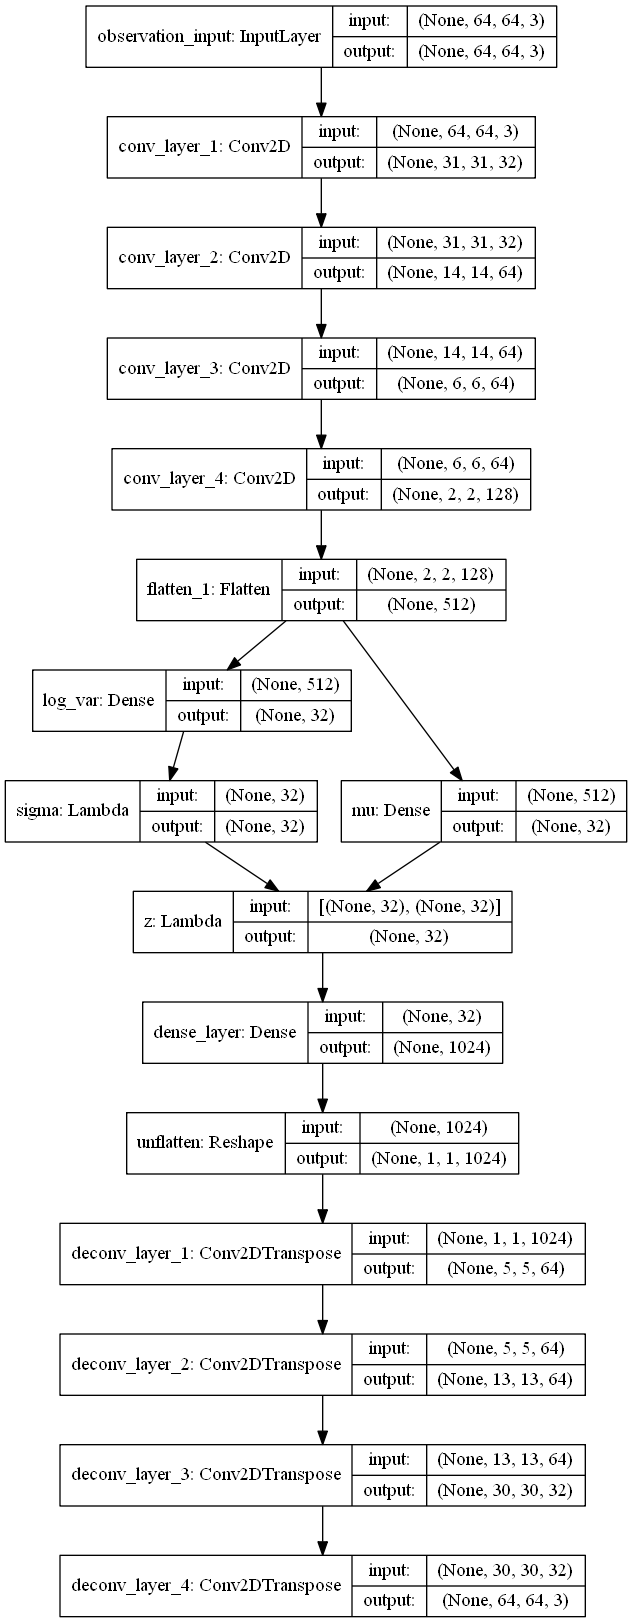

In [4]:

plot_model(vae.full_model, to_file='./vae/model.png', show_shapes=True)

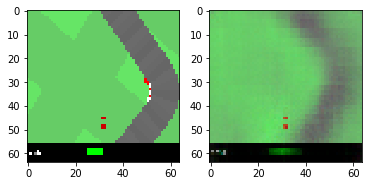

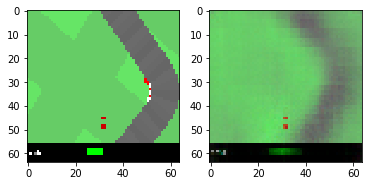

In [5]:
### output from one episode

for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

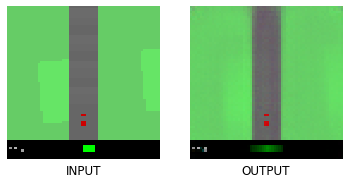

In [6]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [7]:
encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
mu = encoded_mu_log_var[0][0]
log_var = encoded_mu_log_var[1][0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [-0.413   0.1493  0.0683 -0.0636 -0.0305 -0.1308  0.1083  0.3147 -0.0438
 -0.0768  0.1455 -0.0396 -0.0322 -0.0189  0.2661 -0.4285  0.0362 -1.8511
 -0.1175  0.2145  0.1731  0.1522  0.1258 -0.1359 -0.4009  1.6972  0.2326
 -0.0995  0.1566  0.3352 -1.5807 -0.0506]
log_var = [-2.4378 -0.6423 -0.0788 -0.077  -0.2682 -0.2041 -0.1574 -0.4436 -0.0502
 -0.0694 -0.1    -0.0821 -0.6334 -0.2328 -1.0897 -1.1956 -0.1534 -4.259
 -0.1794 -0.1627 -0.316  -0.1846 -0.5097 -0.2355 -4.6614 -4.8106 -4.4591
 -0.1339 -0.0963 -1.5233 -4.6122 -0.1447]
z = [-0.0309  0.1259  0.1067  1.0298  0.7688  0.5398  0.73    0.3198 -0.1657
 -1.1599  0.5301  0.2379 -0.3999  1.1465  0.5177 -0.3244  0.0513 -1.6691
 -1.1356  0.3703 -0.8888 -1.1434 -0.2097 -0.13   -0.489   1.6377  0.4041
  0.6244  1.1187  0.1155 -1.6741 -0.0144]


informative dimensions:


array([ 0,  1,  4,  5,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 29, 30, 31], dtype=int64)

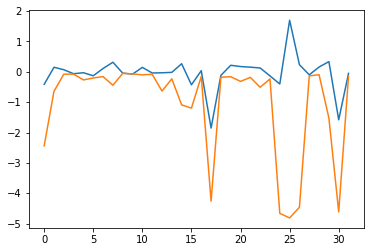

In [8]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.1)[0]
hot_zs

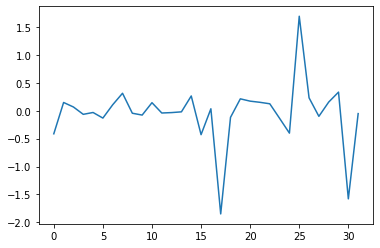

In [9]:
plt.plot(mu);

In [10]:
file1 = os.listdir(DIR_NAME)[200]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[260]
obs_data2 = np.load(DIR_NAME + file)['obs']

top_left = vae.encoder.predict(np.array([obs_data1[20]]))[0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[4] = (x-2)
        z[7] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[4] ' + str(np.round(z[4],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[7] = ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

IndexError: list index out of range

In [ ]:

def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )